*Copyright statement:
This material, no matter whether in printed or electronic form, may be used for personal and non-commercial educational use only. Any reproduction of this manuscript, no matter whether as a whole or in parts, no matter whether in printed or in electronic form, requires explicit prior acceptance of the authors.*

# Polynomial Regression

The goal of polynomial regression (or also linear regression) is to find the function which best models the relationship between an independent variable $x$ and a dependent variable $y$ as an $n$-th degree polynomial. With polynomial regression, this means finding the coefficients that provide the best fit to a non-linear relationship in the data, which a straight line (linear regression) cannot always do precisely.

We model this relationship through the polynomial:

$$y \approx \theta_0 + \theta_1 x + \theta_2 x^2 + \theta_3 x^3 + ... + \theta_n x^n$$

where the thetas $\theta_0, \theta_1, ..., \theta_n$ are the parameters we are trying to find.


TODO:

*    Generate synthetic, noisy data we are trying to fit a function to
*    Set up a pipeline for polynomial regression using `sklearn`
*    Fit and predict a function that models the relationship in our data
*    Visualize the results of our model in comparison to the true polynomial

We first import all necessary packages:


In [2]:
!pip install ipympl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 515.7/515.7 kB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 66.9 MB/s eta 0:00:00


In [3]:
# necessary imports
import numpy as np
import matplotlib.pyplot as plt
import torch

# sklearn packages for performing polynomial regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

%matplotlib widget

ValueError: Key backend: 'module://ipympl.backend_nbagg' is not a valid value for backend; supported values are ['gtk3agg', 'gtk3cairo', 'gtk4agg', 'gtk4cairo', 'macosx', 'nbagg', 'notebook', 'qtagg', 'qtcairo', 'qt5agg', 'qt5cairo', 'tkagg', 'tkcairo', 'webagg', 'wx', 'wxagg', 'wxcairo', 'agg', 'cairo', 'pdf', 'pgf', 'ps', 'svg', 'template', 'inline']

Next, we set a seed for deterministic data generation:

In [ ]:
# seed for reproducibility
np.random.seed(42)

### Data generation

Now let's generate some datapoints. We generate 800 datapoints, all between x=(-1.5, 1.5), and model their relationship along a true polynomial `y_true`, given some pre-defined coefficients `a,b,c,d`. Finally, to make it look more like real data you could have gained from an experiment, we make the data noisy. Training on noisy data also makes sure that our model becomes more robust and can generalize even if outliers are present, as it helps simulate the unpredictability of the real world. Feel free to play around with the numbers below and observe your results:

In [ ]:
# we want to generate a polynomial of degree 3, i.e. a cubic polynomial function y = ax³ + bx² + cx + d + gauss_noise
# define the number of datapoints we want to generate
n_samples = 800

# we generate the coefficients a,b,c,d here
a, b, c, d = 5, -1, 3, 1

# generate x-axis positions
x = np.linspace(-1.5, 1.5, n_samples)

# calculate target (true) y-axis positions
y_true = a*x**3 + b*x**2 + c*x + d

# add gaussian noise
noise = np.random.normal(loc=0, scale=4, size=n_samples)
y = y_true + noise

We now visualize the created data and the underlying true polynomial. In real-world scenarios, we often do not know this true underlying function, thus we use Machine Learning to learn it. Our goal would be to come as close to the true polynomial as possible after training our model.

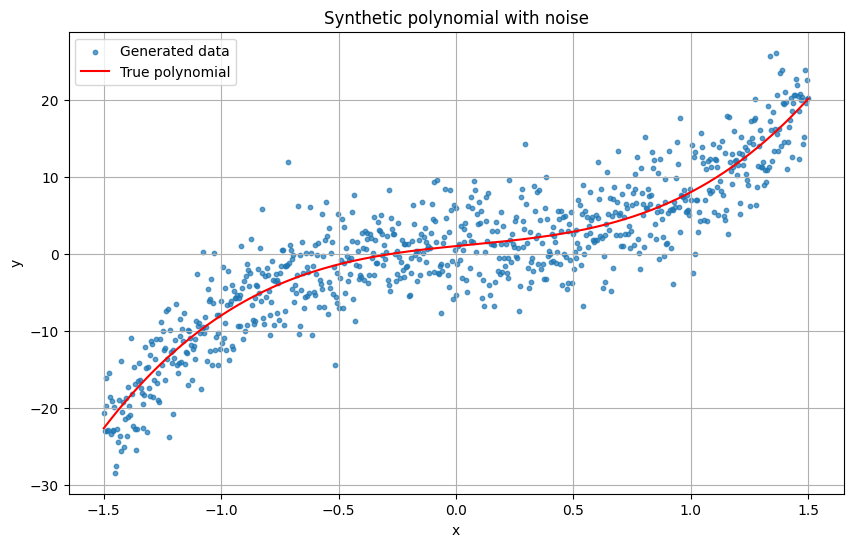

In [ ]:
# visualize the generated data
plt.figure(figsize=(10, 6))
plt.scatter(x, y, s=10, alpha=0.7, label='Generated data')
plt.plot(x, y_true, 'r-', label='True polynomial')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.title('Synthetic polynomial with noise')
plt.show()

### Polynomial Regression Pipeline

`sklearn` has many pre-implemented functions to make the polynomial regression task fairly easy to implement.

`make_pipeline` constructs a `Pipeline` of the transformations you pass to it. It allows you to sequentially pass operations for transforming your data, and end the pipeline with a predictor, like 'LinearRegression' in our case. For more information, you can read the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html).

`PolynomialFeatures` transforms the input features (`x, y`) into polynomial combinations. This allows the model to learn nonlinear relationships between features and the target. `degree=3` means that the model will consider terms up to cubic ($x^3$) for the combinations. For more information, check out the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html).

After generating polynomial features, a `LinearRegression` model is fitted to these transformed features. Despite being linear, the model can now fit nonlinear patterns due to the polynomial expansion in the data transformation step before.

The `fit` method in `sklearn` is equal to the training/eval loop that we know from our neural networks. Thus, `fit` trains the model on the `x,y`. After training, our model can do inference with the `predict` method. Given `x`, it should now predict the corresponding `y` values.

In [ ]:
# create model pipeline
degree = 3
model = make_pipeline(
    PolynomialFeatures(degree=degree),
    LinearRegression()
)

# reshape since fit and predict expect a 2d x array
x = x.reshape(-1, 1)

#fit linear regression model with poly features
model.fit(x, y)

# predict fitted line
y_pred = model.predict(x)

After training our model, we can use `named_steps` to access the results of certain steps in our previously defined pipeline. For drawing the predicted polynomial, we want to extract the learned coefficients.

In [ ]:
coefficients = model.named_steps['linearregression'].coef_
intercept = model.named_steps['linearregression'].intercept_

a_est = coefficients[-1]
b_est = coefficients[-2]
c_est = coefficients[-3]
d_est = intercept

print(f'Estimated coefficients: a={a_est:.3f}, b={b_est:.3f}, c={c_est:.3f}, d={d_est:.3f}')
print(f'True coefficients: a={a}, b={b}, c={c}, d={d}')

Estimated coefficients: a=5.470, b=-1.100, c=2.364, d=1.044
True coefficients: a=5, b=-1, c=3, d=1


As we see, our model comes quite close to the true coefficients. Finally, we visualize our results. We show the originally generated, noisy data, the underlying true polynomial (we don't know this in advance) in red, and the predicted polynomial in dashed blue.

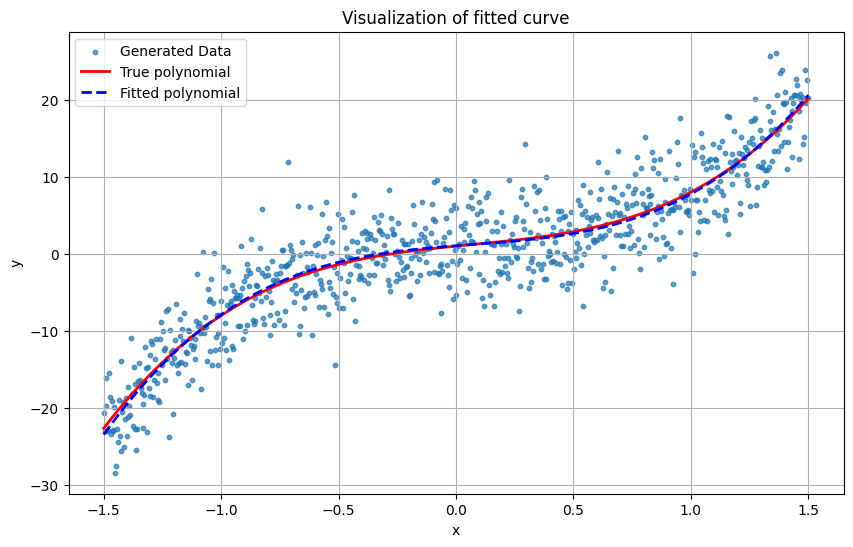

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(x, y, s=10, alpha=0.7, label='Generated Data')
plt.plot(x, y_true, 'r-', linewidth=2, label='True polynomial')
plt.plot(x, y_pred, 'b--', linewidth=2, label='Fitted polynomial')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.title('Visualization of fitted curve')
plt.show()

We observe that our model can fit the data very well and comes very close to the underlying true polynomial, even with noise present, suggesting that it is robust and has great generalizability.